In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
import cv2

In [54]:
path="G:/py prog/machine learning-deep learning/gender and age/UTKFace_data/UTKFace/"
files=os.listdir(path)
size=len(files)
print(size)

23708


In [57]:
images=[]
ages=[]
genders=[]

for file in files:
    #image=cv2.imread(path+file,0)
    #image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    split_var = file.split('_')
    ages.append(int(split_var[0]))
    genders.append(int(split_var[1]))
    #images.append(Image.open('G:/py prog/machine learning-deep learning/gender and age/UTKFace_data/UTKFace/' + file))

In [58]:
images=pd.Series(list(images),name="Images")
ages=pd.Series(list(ages),name='Ages')
genders=pd.Series(list(genders),name="Genders")

df=pd.concat([images,ages,genders],axis=1)
df

,Images,Ages,Genders
0,"[[[196], [193], [185], [172], [156], [142], [1...",100,0
1,"[[[196], [193], [185], [172], [156], [142], [1...",100,0
2,"[[[196], [193], [185], [172], [156], [142], [1...",100,1
3,"[[[196], [193], [185], [172], [156], [142], [1...",100,1
4,"[[[196], [193], [185], [172], [156], [142], [1...",100,1
...,...,...,...
23703,"[[[196], [193], [185], [172], [156], [142], [1...",9,1
23704,"[[[196], [193], [185], [172], [156], [142], [1...",9,1
23705,"[[[196], [193], [185], [172], [156], [142], [1...",9,1
23706,"[[[196], [193], [185], [172], [156], [142], [1...",9,1


In [42]:
display(df['Images'][0])
print(df['Ages'][0], df['Genders'][0])

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [21]:
def age_group(age):
    if age >=0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 80:
        return 3
    else:
        return 4

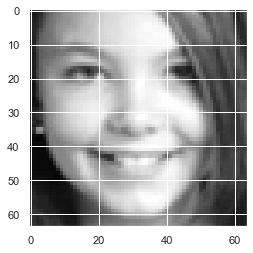

In [22]:
# pre processing
target = np.zeros((size,2),dtype='float32')
features = np.zeros((size,sample.shape[0],sample.shape[1],1),dtype = 'float32')
for i in range(size):
    target[i,0] = age_group(int(ages[i])) / 4
    target[i,1] = int(genders[i])
    features[i] = images[i]
features = features / 255
display(features[550])

## visualizing and preparing data

C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ages', ylabel='Density'>

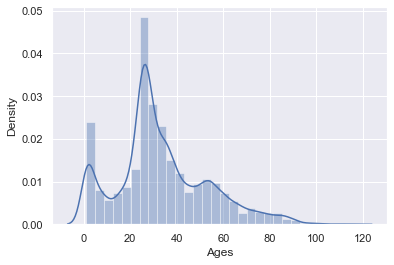

In [23]:
sns.set_theme()
sns.distplot(df["Ages"],kde=True,bins=30)

C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 14000.0)

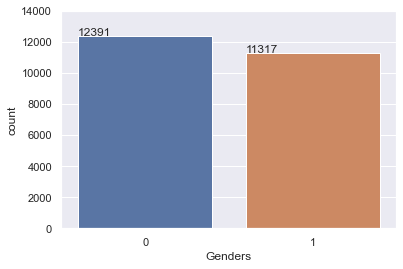

In [10]:
from decimal import Decimal
ax=sns.countplot(df['Genders'])
for p in ax.patches:
    ax.annotate('{}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))
plt.ylim(0,14000)

## test treain split

In [12]:
y_age = df['Ages']
y_gender = df['Genders']

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age,random_state=21)

x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.2, stratify=y_gender,random_state=21)

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(features, target, test_size=0.2,shuffle  = True)

x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(features, target, test_size=0.2,shuffle  = True)
print("Samples in Training:",x_train.shape[0])
print("Samples in Testing:",x_test.shape[0])

In [13]:
print(x.shape)
print(x_train_age.shape)
print(x_train_gender.shape)

(23708, 64, 64, 1)
(18966, 64, 64, 1)
(18966, 64, 64, 1)


## model creation

In [14]:
from keras.layers import *
from keras.models import *
from keras import backend as K

In [15]:
K.image_data_format() == 'channels_first'

False

In [16]:
model10=keras.models.Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(64,64,1)),
    MaxPooling2D(pool_size=(4,4),strides=(4,4)),
    Dropout(0.25),
    
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),

    Flatten(),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(2,activation='sigmoid')

])

ValueError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_3/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](dropout_2/cond/Identity, conv2d_3/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [3,3,64,128].

In [151]:
agemodel=keras.models.Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(64,64,1)),
    MaxPooling2D(pool_size=(4,4)),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Flatten(),
    Dense(32,activation='relu'),
    Dropout(0.3),
    Dense(32,activation='relu'),
    Dropout(0.5),
    Dense(1,activation="sigmoid")
])

ValueError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_271/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](max_pooling2d_268/MaxPool, conv2d_271/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [3,3,128,128].

In [134]:
genmodel=keras.models.Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(64,64,1)),
    MaxPooling2D(pool_size=(4,4)),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.3),
    Dense(32,activation='relu'),
    Dropout(0.5),
    Dense(1,activation="sigmoid")
])

ValueError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_216/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](max_pooling2d_214/MaxPool, conv2d_216/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [3,3,64,128].